In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
n = 100
apple_width = np.random.normal(6, 1, n)
apple_length = np.random.normal(6, 1, n)
banana_width = np.random.normal(4, 1, n)
banana_length = np.random.normal(8, 1, n)
Watermelon_width = np.random.normal(10, 1, n)
Watermelon_length = np.random.normal(12, 1, n)

In [3]:
x_width = 3
x_length = 9

y_width = 7
y_length = 5

z_width = 5
z_length = 7

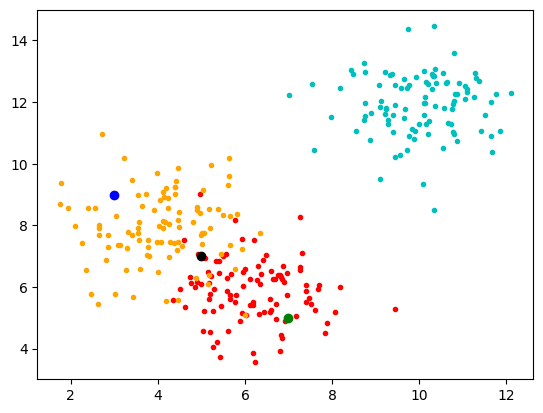

In [47]:
plt.scatter(apple_width, apple_length, c = 'red', marker='.')
plt.scatter(banana_width, banana_length, c = 'orange', marker='.')
plt.scatter(Watermelon_width, Watermelon_length, c = 'c', marker='.')
plt.scatter(x_width, x_length, c = 'blue', marker='o')
plt.scatter(y_width, y_length, c = 'green', marker='o')
plt.scatter(z_width, z_length, c = 'black', marker='o')
plt.show()

In [48]:
width = np.concatenate((apple_width, banana_width, Watermelon_width))
length = np.concatenate((apple_length, banana_length, Watermelon_length))

X_train = np.array([width, length]).T

In [49]:
Y_apples = np.zeros(n, dtype='int')
Y_banana = np.ones(n, dtype='int')
Y_Watermelon = np.ones(n, dtype='int')*2
Y_train = np.concatenate((Y_apples, Y_banana,Y_Watermelon))

In [7]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [8]:
mamad = np.array([4,5])
sajjad = np.array([10,2])

euclidean_distance(mamad, sajjad)

6.708203932499369

In [9]:
new_fruit = np.array([5, 7])

distances = []
for x in X_train:
    d = euclidean_distance(new_fruit, x)
    distances.append(d)

distances

[2.031364837609215,
 2.0912177823363765,
 1.6676975065877233,
 2.4102916274145514,
 3.0621181733523346,
 2.6460858116833452,
 2.140647979454873,
 0.7539434054334582,
 0.576267158911469,
 2.4815971011247804,
 0.9723431267615109,
 0.9684819317076642,
 1.27818507195629,
 1.1872168112092818,
 2.118651122185429,
 1.516914315756953,
 0.6613157240447131,
 0.9932384456834173,
 1.0052799622844273,
 2.772472964920268,
 2.010568101655501,
 1.4242123490536693,
 3.173702624672687,
 3.151889616484219,
 2.532421550731971,
 0.5398869774309845,
 0.35342615522468296,
 3.4304844208271414,
 2.2664637421492366,
 2.193778599730545,
 0.7254523120304344,
 3.5776600921131365,
 1.5008344645776928,
 1.703922754812664,
 0.5332538869114919,
 1.5685850260289183,
 2.1436420348374803,
 1.1723072055572947,
 1.3730483527555097,
 1.4304187116858547,
 3.4785503440678673,
 2.648453399698355,
 2.3796746337728716,
 1.9306399446258002,
 3.3849748737206355,
 2.1636013028823804,
 3.091304506547383,
 1.3235033814789188,
 2.6037

In [10]:
k = 5
nearest_neighbors = np.argsort(distances)[0:k]
nearest_neighbors

array([ 68, 124,  69, 146,  26], dtype=int64)

In [11]:
max(np.sort(distances)[0:k])

0.35342615522468296

In [12]:
Y_train[nearest_neighbors]

array([0, 1, 0, 1, 0])

In [13]:
result = np.bincount(Y_train[nearest_neighbors])
if np.argmax(result) == 0:
    print('🍎')
else:
    print('🍌')

🍎


## My code

In [50]:
n = 100
apple_width = np.random.normal(6, 1, n)
apple_length = np.random.normal(6, 1, n)
banana_width = np.random.normal(4, 1, n)
banana_length = np.random.normal(8, 1, n)
Watermelon_width = np.random.normal(10, 1, n)
Watermelon_length = np.random.normal(12, 1, n)

In [51]:
width = np.concatenate((apple_width, banana_width, Watermelon_width))
length = np.concatenate((apple_length, banana_length, Watermelon_length))

X_train = np.array([width, length]).T

Y_apples = np.zeros(n, dtype='int')
Y_banana = np.ones(n, dtype='int')
Y_Watermelon = np.ones(n, dtype='int')*2
Y_train = np.concatenate((Y_apples, Y_banana,Y_Watermelon))

In [65]:
k = 5
def myKNN(X_train, Y_train, k, X_test):
    distances = []
    for x in X_train:
        d = euclidean_distance(X_test, x)
        d = np.sqrt(np.sum((X_test-x)**2))
        distances.append(d)

    nearest_neighbors = np.argsort(distances)[0:k]
    result = np.bincount(Y_train[nearest_neighbors])
    return np.argmax(result), max(np.sort(distances)[0:k])


In [66]:
new_fruits = np.array([[5, 6],[5, 8],[4, 4],[9, 8],[7, 10],[4, 6],[2, 9],[6, 8],[12, 11],[11, 8]])
results = []
for new_fruit in new_fruits:
    result, destance = myKNN(X_train, Y_train, k, new_fruit)
    results.append([result, destance])


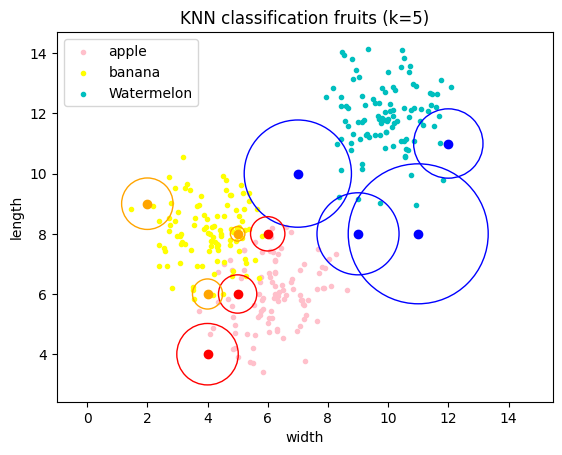

In [67]:
fig, ax = plt.subplots()
plt.scatter(apple_width, apple_length, c = 'pink', marker='.')
plt.scatter(banana_width, banana_length, c = 'yellow', marker='.')
plt.scatter(Watermelon_width, Watermelon_length, c = 'c', marker='.')
for i in range(len(new_fruits)):
    if (results[i][0] == 1):
        color = 'orange'
    elif (results[i][0] == 0):
        color = 'red'
    else:
        color = 'blue'
    plt.scatter(new_fruits[i,0], new_fruits[i,1], c = color, marker='o')
    circle = plt.Circle((new_fruits[i,0], new_fruits[i,1]), results[i][1], color=color, fill=False)
    ax.add_patch(circle)
plt.axis('equal')
plt.title(f'KNN classification fruits (k={k})')
plt.xlabel('width')
plt.ylabel('length')
plt.legend(['apple','banana','Watermelon'])
plt.show()